In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [4]:
df = pd.read_csv('AIML Dataset.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.info(), df['isFraud'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


(None,
 isFraud
 0    6354407
 1       8213
 Name: count, dtype: int64)

Text(0, 0.5, 'Count')

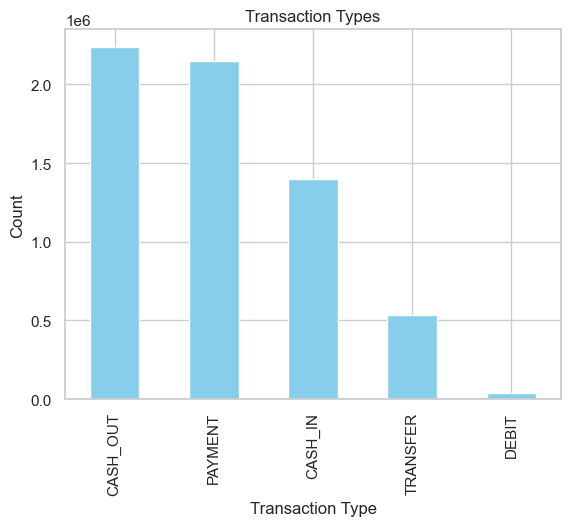

In [6]:
df['type'].value_counts().plot(kind='bar', title='Transaction Types', color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")

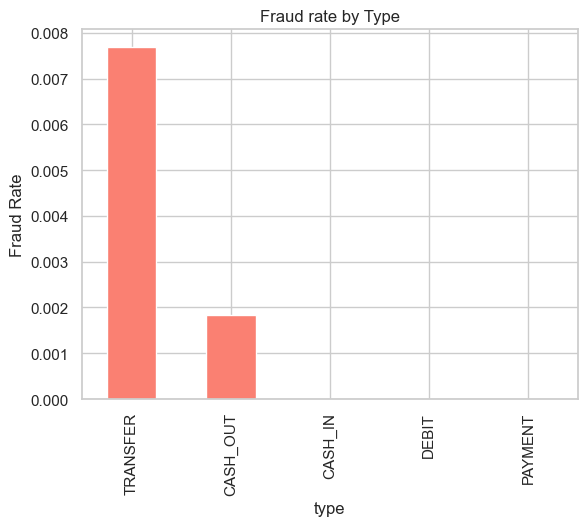

In [7]:
fraud_by_types = df.groupby("type")['isFraud'].mean().sort_values(ascending=False)
fraud_by_types.plot(kind='bar', title="Fraud rate by Type", color='salmon')
plt.ylabel('Fraud Rate')
plt.show()

In [11]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

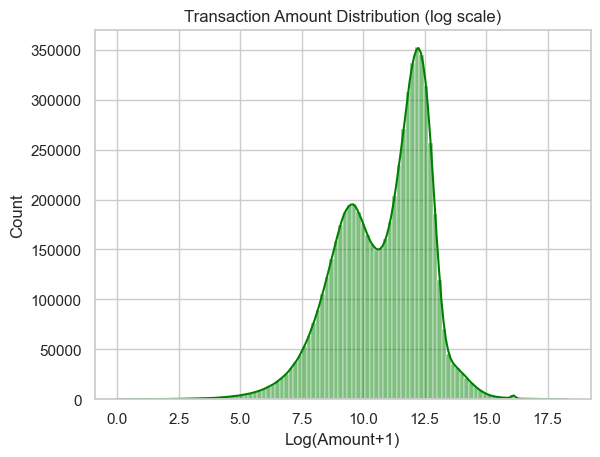

In [12]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='green')
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount+1)")
plt.show()

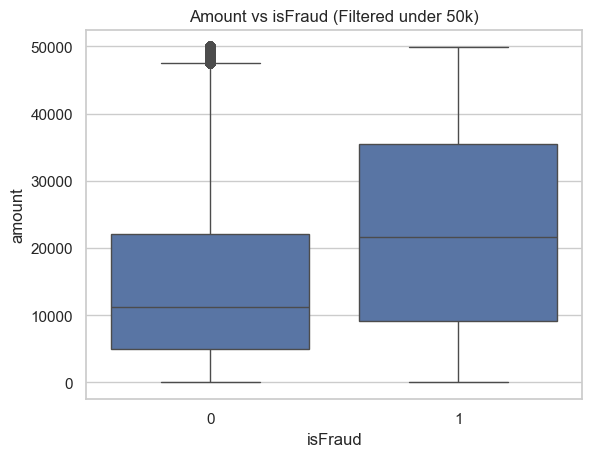

In [13]:
sns.boxplot(data=df[df['amount'] < 50000], x = 'isFraud', y='amount')
plt.title('Amount vs isFraud (Filtered under 50k)')
plt.show()

In [14]:
df['balancedDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balancedDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [15]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


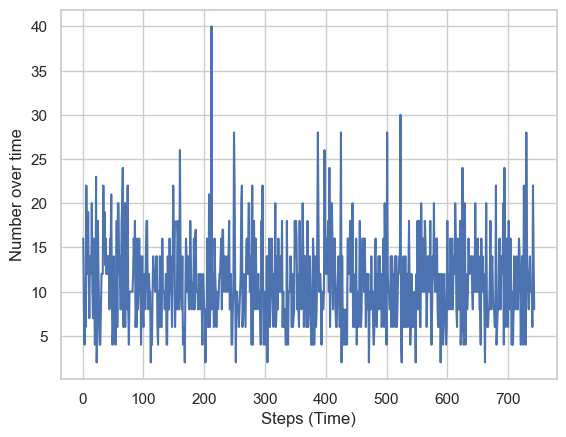

In [16]:
frauds_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per step")
plt.xlabel('Steps (Time)')
plt.ylabel('Number over time')
plt.grid(True)
plt.show()

In [17]:
df.drop(columns='step', inplace=True)

In [18]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [19]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [20]:
fraud_users = df[df['isFraud']==1]['nameOrig'].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
Name: count, dtype: int64

In [21]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [22]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [24]:
zero_after_transfer = df[
            (df['oldbalanceOrg'] >0) &
            (df['newbalanceOrig'] == 0) &
            (df['type'].isin(['TRANSFER','CASH_OUT']))
]

In [26]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [27]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [30]:
df_model = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedDiffOrig,balancedDiffDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,-21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00


In [31]:
categorical=['type']
numeric=['amount', 'oldbalanceOrg', 'newbalanceDest', 'newbalanceDest']
y=df_model['isFraud']
x=df_model.drop('isFraud', axis=1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y)

In [34]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)

In [36]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf',LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [37]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [39]:
y_pred = pipeline.predict(x_test)

In [44]:
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))
pipeline.score(x_test, y_test)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.93      0.96   1906322
       Fraud       0.02      0.92      0.03      2464

    accuracy                           0.93   1908786
   macro avg       0.51      0.92      0.50   1908786
weighted avg       1.00      0.93      0.96   1908786



0.9285928333506218

In [53]:
def input_from_user(transaction_type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest):
    input_data = pd.DataFrame([{
        'type':transaction_type,
        'amount': amount,
        'oldbalanceOrg':oldbalanceOrg,
        'newbalanceOrig':newbalanceOrig,
        'oldbalanceDest':oldbalanceDest,
        'newbalanceDest':newbalanceDest
    }])

    prediction=pipeline.predict(input_data)[0]

    if prediction==1:
        print("This transaction is a fraud")
    else:
        print("This transaction is not a fraud")

In [56]:
amount = float(input('Enter the amount'))
oldbalanceOrg=float(input('Enter Old Balance(Sender)'))
newbalanceOrig=float(input('Enter New Balance(Sender)'))
oldbalanceDest=float(input('Enter Old Balance(Receiver)'))
newbalanceDest=float(input('Enter New Balance(Receiver)'))
transaction_type=input("Enter transaction type (PAYMENT, TRANSFER, CASH_OUT or DEPOSIT)")

input_from_user(transaction_type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest)

Enter the amount 1000000
Enter Old Balance(Sender) 10000000
Enter New Balance(Sender) 0
Enter Old Balance(Receiver) 0
Enter New Balance(Receiver) 0
Enter transaction type (PAYMENT, TRANSFER, CASH_OUT or DEPOSIT) CASH_OUT


This transaction is a fraud
